Pomysły:
- porównanie ocen użytkowników i krytyków np. na tle runtime i revenue -> 3d
- analiza ocen/zysku w zależności od aktorów / reżysera 
- czy film który dużo zarabia ma dobre oceny?
- gatunek, który najbardziej / najmniej popularny
- po czym rozpoznajemy film? (aktor, reżyser)

TODO:
- zmiana tytułów
- statystyki -> describe
- usunięcie revenue -> null (albo wszyskie z nullami) : analizujemy zyski więc wyrzucami nulle
- plotowanie tego, 2d, 3d
- usunięcie / wyszukanie nietypowych : 3 sigma

- wyekstrahowanie stringów -> aktorzy, filmy,
- czy film który dużo zarabia ma dobre oceny?
- ogarnąć klasteryzacje (k sąsiadów -> dla różnych k) / klasyfikacje w pythonie
- 3d, zrzutować na osie

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

df = pd.read_csv('movie_data.csv')

df = df.drop(columns='Rank')
df.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [20]:
df = df.sort_values("Revenue (Millions)", ascending=True)
df = df.dropna()
df.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


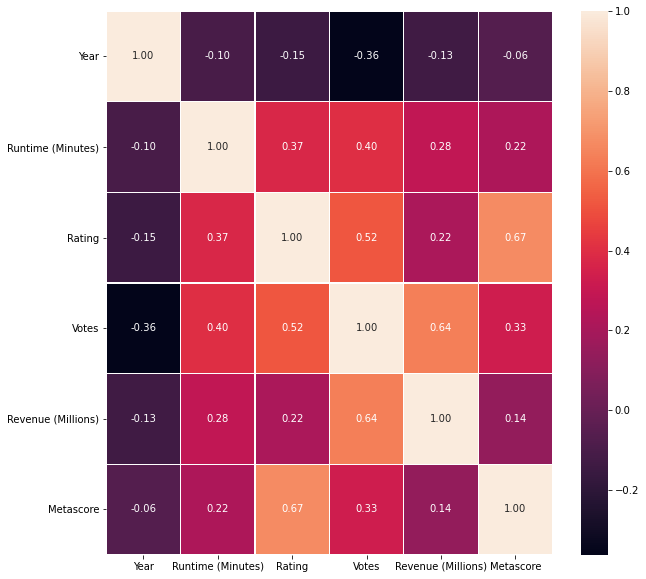

In [21]:
movies_corr = df.corr()
f,ax = plt.subplots(figsize=(10, 10))
sea.heatmap(movies_corr, annot = True, linewidths = 0.1, fmt= '.2f', ax=ax )
plt.show()

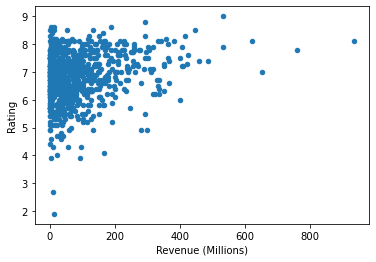

In [9]:
df_1 = df[['Rating', 'Revenue (Millions)']]
df_1.plot(x="Revenue (Millions)", y="Rating", kind='scatter')

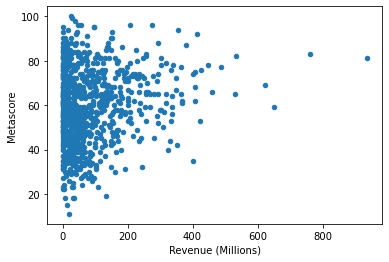

In [10]:
df_1 = df[['Metascore', 'Revenue (Millions)']]
df_1.plot(x="Revenue (Millions)", y="Metascore", kind='scatter')

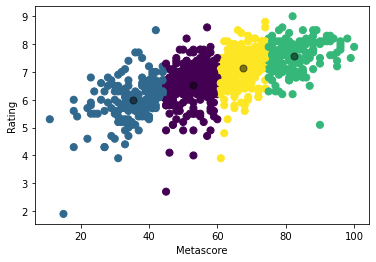

In [39]:
from sklearn.cluster import KMeans

df_1 = df[['Rating', 'Metascore']]
# df_1.plot(x="Rating", y="Revenue (Millions)", kind='scatter')

kmeans = KMeans(n_clusters=4, init='random', random_state=0).fit(df_1)

y_kmeans = kmeans.predict(df_1)

plt.scatter(df_1['Metascore'], df_1['Rating'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Metascore")
plt.ylabel("Rating")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=50, alpha=0.5);
plt.show()

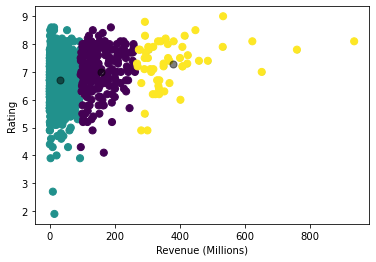

In [15]:
from sklearn.cluster import KMeans

x1 = 'Revenue (Millions)'
x2 = "Rating"

df_1 = df[[x1, x2]]
df_1.plot(x=x1, y=x2, kind='scatter')

kmeans = KMeans(n_clusters=3, init='random', random_state=0).fit(df_1)

y_kmeans = kmeans.predict(df_1)

plt.scatter(df_1[x1], df_1[x2], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel(x1)
plt.ylabel(x2)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);
plt.show()

In [4]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000
